1. Importing libraries considered important

In [1]:
import numpy as np
import pandas as pd
import pyodbc as odbc
from matplotlib import pyplot as plt
import seaborn as sns
from skimpy import skim
import statsmodels.formula.api as smf
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage
import statsmodels.api as sm
import datetime
import plotly
from plotly import tools
import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from IPython.display import HTML, Image
sns.set_theme()
pd.options.display.max_columns = None

2.1 Dataprocessing - Importing datasets

In [2]:
data = pd.read_csv(r'C:\Users\asus\OneDrive\Desktop\Temporal\March Basketball Mania\MRegularSeasonDetailedResults.csv',
                    sep=',',
                    encoding='UTF-8')
Teams = pd.read_csv(r'C:\Users\asus\OneDrive\Desktop\Temporal\March Basketball Mania\MTeams.csv',
                    sep=',',
                    encoding='UTF-8')
Ranking= pd.read_csv(r'C:\Users\asus\OneDrive\Desktop\Temporal\March Basketball Mania\MMasseyOrdinals.csv',
                    sep=',',
                    encoding='UTF-8')
Coaches = pd.read_csv(r'C:\Users\asus\OneDrive\Desktop\Temporal\March Basketball Mania\MTeamCoaches.csv',
                    sep=',',
                    encoding='UTF-8')

2.2 Dataprocessing - Creating Datamodel

In [3]:
#####Merging Data#####
data = pd.merge(left=data,
         right=Teams,
         how='left',
         left_on='WTeamID',
         right_on='TeamID')

data = pd.merge(left=data,
         right=Teams,
         how='left',
         left_on='LTeamID',
         right_on='TeamID')

data = pd.merge(left=data,
         right=Coaches,
         how='left',
         left_on=['LTeamID','Season'],
         right_on=['TeamID','Season'])
######Some Modifications for the fourth merge

data= data[['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF',
       'TeamName_x', 'TeamName_y','CoachName']]

data = data.rename(columns={'TeamName_x':'LoseTeamName','TeamName_y':'WinTeamName','CoachName':'LoseTeamCoach'})

#####Fourth Merge##########
data = pd.merge(left=data,
         right=Coaches,
         how='left',
         left_on=['WTeamID','Season'],
         right_on=['TeamID','Season'])

data = data[['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF',
       'LoseTeamName', 'WinTeamName', 'LoseTeamCoach','CoachName']]

data = data.rename(columns={'CoachName':'WinTeamCoach'})

data = data[['Season', 'DayNum', 'WTeamID','WinTeamName','WinTeamCoach', 'WScore', 'LTeamID', 'LoseTeamName','LoseTeamCoach', 'LScore',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF']]

3.1 EDA

In [4]:
data.head()

Season  DayNum  WTeamID WinTeamName    WinTeamCoach  WScore  LTeamID  \
0    2003      10     1104    Oklahoma  mark_gottfried      68     1328   
1    2003      10     1272    Syracuse   john_calipari      70     1393   
2    2003      11     1266   Villanova       tom_crean      73     1437   
3    2003      11     1296    Winthrop      rob_judson      56     1457   
4    2003      11     1400     Georgia     rick_barnes      77     1208   

  LoseTeamName   LoseTeamCoach  LScore  NumOT  WFGM  WFGA  WFGM3  WFGA3  WFTM  \
0      Alabama  kelvin_sampson      62      0    27    58      3     14    11   
1      Memphis     jim_boeheim      63      0    26    62      8     20    10   
2    Marquette      jay_wright      61      0    24    58      8     18    17   
3   N Illinois  gregg_marshall      50      0    18    38      3      9    17   
4        Texas     jim_harrick      71      0    30    61      6     14    11   

   WFTA  WOR  WDR  WAst  WTO  WStl  WBlk  WPF  LFGM  LFGA  LFGM3  LFGA3  LFTM  \
0    18   14   24    13   23     7     1   22    22    53      2     10    16   
1    19   15   28    16   13     4     4   18    24    67      6     24     9   
2    29   17   26    15   10     5     2   25    22    73      3     26    14   
3    31    6   19    11   12    14     2   18    18    49      6     22     8   
4    13   17   22    12   14     4     4   20    24    62      6     16    17   

   LFTA  LOR  LDR  LAst  LTO  LStl  LBlk  LPF  
0    22   10   22     8   18     9     2   20  
1    20   20   25     7   12     8     6   16  
2    23   31   22     9   12     2     5   23  
3    15   17   20     9   19     4     3   23  
4    27   21   15    12   10     7     1   14

In [5]:
data.describe()

Season         DayNum        WTeamID         WScore  \
count  121299.000000  121299.000000  121299.000000  121299.000000   
mean     2014.264421      70.727475    1288.497399      75.909579   
std         6.571929      35.902963     105.390559      11.001583   
min      2003.000000       0.000000    1101.000000      34.000000   
25%      2009.000000      40.000000    1199.000000      68.000000   
50%      2014.000000      75.000000    1287.000000      75.000000   
75%      2020.000000     102.000000    1382.000000      83.000000   
max      2025.000000     132.000000    1480.000000     149.000000   

             LTeamID         LScore          NumOT           WFGM  \
count  121299.000000  121299.000000  121299.000000  121299.000000   
mean     1283.419888      63.913808       0.068673      26.417374   
std       104.799775      10.845831       0.304895       4.679982   
min      1101.000000      20.000000       0.000000      10.000000   
25%      1192.000000      57.000000       0.000000      23.000000   
50%      1282.000000      64.000000       0.000000      26.000000   
75%      1375.000000      71.000000       0.000000      29.000000   
max      1480.000000     144.000000       6.000000      57.000000   

                WFGA          WFGM3          WFGA3           WFTM  \
count  121299.000000  121299.000000  121299.000000  121299.000000   
mean       55.794912       7.357604      19.362847      15.717228   
std         7.450270       3.124420       6.037328       6.221782   
min        26.000000       0.000000       1.000000       0.000000   
25%        51.000000       5.000000      15.000000      11.000000   
50%        56.000000       7.000000      19.000000      15.000000   
75%        61.000000       9.000000      23.000000      20.000000   
max       103.000000      26.000000      56.000000      50.000000   

                WFTA            WOR            WDR           WAst  \
count  121299.000000  121299.000000  121299.000000  121299.000000   
mean       21.978565      10.354974      25.631415      14.704721   
std         8.082725       4.126463       4.873117       4.423204   
min         0.000000       0.000000       5.000000       1.000000   
25%        16.000000       7.000000      22.000000      12.000000   
50%        21.000000      10.000000      25.000000      14.000000   
75%        27.000000      13.000000      29.000000      17.000000   
max        67.000000      38.000000      54.000000      41.000000   

                 WTO           WStl           WBlk            WPF  \
count  121299.000000  121299.000000  121299.000000  121299.000000   
mean       12.562412       6.976339       3.780394      17.148740   
std         4.017739       3.094975       2.412645       4.131613   
min         1.000000       0.000000       0.000000       3.000000   
25%        10.000000       5.000000       2.000000      14.000000   
50%        12.000000       7.000000       3.000000      17.000000   
75%        15.000000       9.000000       5.000000      20.000000   
max        33.000000      26.000000      21.000000      41.000000   

                LFGM           LFGA          LFGM3          LFGA3  \
count  121299.000000  121299.000000  121299.000000  121299.000000   
mean       22.813428      56.807204       6.212269      20.176135   
std         4.350918       7.538285       2.805542       6.072023   
min         6.000000      26.000000       0.000000       1.000000   
25%        20.000000      52.000000       4.000000      16.000000   
50%        23.000000      57.000000       6.000000      20.000000   
75%        26.000000      62.000000       8.000000      24.000000   
max        53.000000     106.000000      22.000000      59.000000   

                LFTM           LFTA            LOR            LDR  \
count  121299.000000  121299.000000  121299.000000  121299.000000   
mean       12.074683      17.726354      10.441957      21.621415   
std         5.343026       7.077418       4.220702       4.518614   
min   

3.2 We will split the datasets in two parts

In [6]:
df_win = data[['Season', 'DayNum', 'WTeamID', 'WinTeamName',
       'WScore', 'WinTeamCoach','NumOT', 'WFGM', 
       'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF']]

df_win = df_win.rename(columns={'WTeamID':'Team_ID', 'WinTeamName':'Team_NM','WScore': 'Score','WinTeamCoach':'Team_Coach','NumOT': 'Overtime','WFGM':'Field_goals',
                                'WFGA':'Field_Goal_Att', 'WFGM3':'Field_goals_3p', 'WFGA3':'Field_goal_3p_att', 'WFTM':'Free_thrs_goals',
                                'WFTA':'Free_thrs_att','WOR':'Offs_Rebounds','WDR':'Deff_Rebouds','WAst':'Assist', 'WTO':'TurnOvers', 'WStl':'Steals', 'WBlk':'Blocks', 'WPF':'Fouls'})

df_win['win_lose'] = 1

df_los = data[['Season', 'DayNum', 'LScore','NumOT','LTeamID', 'LoseTeamName', 'LoseTeamCoach',
               'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA',
       'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF']]

df_los = df_los.rename(columns={'LTeamID':'Team_ID', 'LoseTeamName':'Team_NM','LScore': 'Score','LoseTeamCoach':'Team_Coach','NumOT': 'Overtime','LFGM':'Field_goals',
                                'LFGA':'Field_Goal_Att', 'LFGM3':'Field_goals_3p', 'LFGA3':'Field_goal_3p_att', 'LFTM':'Free_thrs_goals',
                                'LFTA':'Free_thrs_att','LOR':'Offs_Rebounds','LDR':'Deff_Rebouds','LAst':'Assist', 'LTO':'TurnOvers', 'LStl':'Steals', 'LBlk':'Blocks', 'LPF':'Fouls'})

df_los['win_lose'] =0

df = pd.concat(objs=[df_win,df_los])

In [9]:
# def AwayWinner(data):
#     if data.WScore > data.LScore:
#         return 1
#     elif (data.WScore == data.LScore):
#         return 0
#     else:
#         return 0
    
# data['AwayWin'] = data.apply(AwayWinner, axis=1)

In [7]:
df['Field_goals_2p'] = df['Field_goals']-df['Field_goals_3p']
df['Field_Goal_2p_att'] = df['Field_Goal_Att']-df['Field_goal_3p_att']
df = df[['Season', 'DayNum', 'Team_ID', 'Team_NM', 'Score', 'Team_Coach',
       'Overtime','Field_goals_3p',
       'Field_goal_3p_att', 'Free_thrs_goals', 'Free_thrs_att',
       'Offs_Rebounds', 'Deff_Rebouds', 'Assist', 'TurnOvers', 'Steals',
       'Blocks', 'Fouls', 'win_lose', 'Field_goals_2p', 'Field_Goal_2p_att']]



In [8]:
df.columns.unique()

Index(['Season', 'DayNum', 'Team_ID', 'Team_NM', 'Score', 'Team_Coach',
       'Overtime', 'Field_goals_3p', 'Field_goal_3p_att', 'Free_thrs_goals',
       'Free_thrs_att', 'Offs_Rebounds', 'Deff_Rebouds', 'Assist', 'TurnOvers',
       'Steals', 'Blocks', 'Fouls', 'win_lose', 'Field_goals_2p',
       'Field_Goal_2p_att'],
      dtype='object')

In [9]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 242598 │ │ int32       │ 19    │                                                          │
│ │ Number of columns │ 21     │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %   ┃ mean    ┃ sd    ┃ p0     ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Season                 │   0 │      0 │    2000 │   6.6 │   2000 │  2000 │  2000 │  2000 │  2000 │ ▇▇▆▇▇▇  │  │
│ │ DayNum                 │   0 │      0 │      71 │    36 │      0 │    40 │    75 │   100 │   130 │ ▅▆▆▇▇▇  │  │
│ │ Team_ID                │   0 │      0 │    1300 │   110 │   1100 │  1200 │  1300 │  1400 │  1500 │ ▇▇▇▇▇▆  │  │
│ │ Score                  │   0 │      0 │      70 │    12 │     20 │    61 │    70 │    78 │   150 │   ▃▇▂   │  │
│ │ Overtime               │   0 │      0 │   0.069 │   0.3 │      0 │     0 │     0 │     0 │     6 │    ▇    │  │
│ │ Field_goals_3p         │   0 │      0 │     6.8 │     3 │      0 │     5 │     7 │     9 │    26 │  ▃▇▃▁   │  │
│ │ Field_goal_3p_att      │   0 │      0 │      20 │   6.1 │      1 │    15 │    19 │    24 │    59 │  ▁▇▆▁   │  │
│ │ Free_thrs_goals        │   0 │      0 │      14 │   6.1 │      0 │     9 │    13 │    18 │    50 │  ▃▇▅▁   │  │
│ │ Free_thrs_att          │   0 │      0 │      20 │   7.9 │      0 │    14 │    19 │    25 │    67 │  ▂▇▅▁   │  │
│ │ Offs_Rebounds          │   0 │      0 │      10 │   4.2 │      0 │     7 │    10 │    13 │    38 │  ▃▇▃▁   │  │
│ │ Deff_Rebouds           │   0 │      0 │      24 │   5.1 │      4 │    20 │    23 │    27 │    54 │   ▃▇▂   │  │
│ │ Assist                 │   0 │      0 │      13 │   4.4 │      0 │    10 │    13 │    16 │    41 │  ▁▇▆▁   │  │
│ │ TurnOvers              │   0 │      0 │      13 │   4.3 │      0 │    10 │    13 │    16 │    41 │  ▁▇▆▁   │  │
│ │ Steals                 │   0 │      0 │     6.5 │     3 │      0 │     4 │     6 │     8 │    26 │  ▅▇▃▁   │  │
│ │ Blocks                 │   0 │      0 │     3.3 │   2.3 │      0 │     2 │     3 │     5 │    21 │   ▇▅▁   │  │
│ │ Fouls                  │   0 │      0 │      18 │   4.5 │      3 │    15 │    18 │    21 │    45 │   ▅▇▂   │  │
│ │ win_lose               │   0 │      0 │     0.5 │   0.5 │      0 │     0 │   0.5 │     1 │     1 │ ▇    ▇  │  │
│ │ Field_goals_2p         │   0 │      0 │      18 │   4.6 │      2 │    15 │    18 │    21 │    48 │   ▇▇▁   │  │
│ │ Field_Goal_2p_att      │   0 │      0 │      37 │   7.5 │      6 │    31 │    36 │    41 │    80 │   ▃▇▃   │  │
│ └────────────────────────┴─────┴────────┴─────────┴───────┴────────┴───────┴───────┴───────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ w

3.2 Graph EDA

This game is about try so much to make 3 points goals and offensive trys

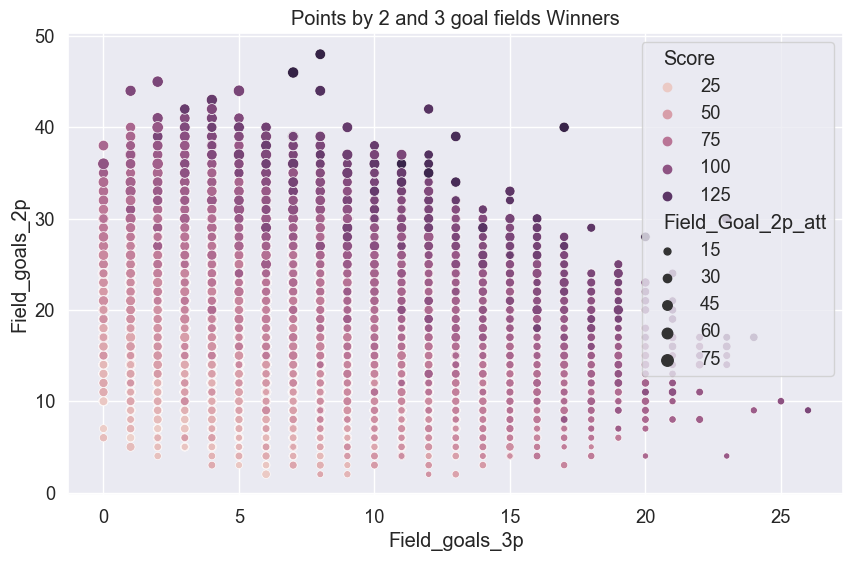

In [10]:
plt.figure(figsize=(10,	6))
sns.set_theme(style='darkgrid',	palette='Set2',	font_scale=1.2)
sns.scatterplot(x='Field_goals_3p',	y='Field_goals_2p', data=df,
hue='Score',	size='Field_Goal_2p_att')
plt.title('Points by 2 and 3 goal fields Winners')
plt.show()

# plt.figure(figsize=(10,	6))
# sns.set_theme(style='darkgrid',	palette='Set2',	font_scale=1.2)
# sns.scatterplot(x='LFGM2',	y='LFGM3', data=df_los,
# hue='LScore',	size='LFGA3')
# plt.title('Points by 2 and 3 goal field')
# plt.show()


In [11]:
Winners_Pts = pd.pivot_table(df,
               values='Score',
               index=['Team_NM'],
               #columns=['Season'],
               aggfunc= sum,
               sort= True).reset_index()

In [12]:
Winners_Pts_hist_tops = Winners_Pts[Winners_Pts['Score'] > 29999]
Winners_Pts_hist_tops= Winners_Pts_hist_tops.iloc[0:10, :]

In [13]:
Winners_Pts_hist_tops.sort_values(by='Score',ascending=True)

Team_NM  Score
7    American Univ  44950
4      Alabama A&M  45234
5       Alabama St  46504
1        Air Force  46541
2            Akron  48202
8   Appalachian St  48512
6        Alcorn St  49365
10      Arizona St  50418
9          Arizona  51091
3          Alabama  52729

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Air Force'),
  Text(1, 0, 'Akron'),
  Text(2, 0, 'Alabama'),
  Text(3, 0, 'Alabama A&M'),
  Text(4, 0, 'Alabama St'),
  Text(5, 0, 'Alcorn St'),
  Text(6, 0, 'American Univ'),
  Text(7, 0, 'Appalachian St'),
  Text(8, 0, 'Arizona'),
  Text(9, 0, 'Arizona St')])

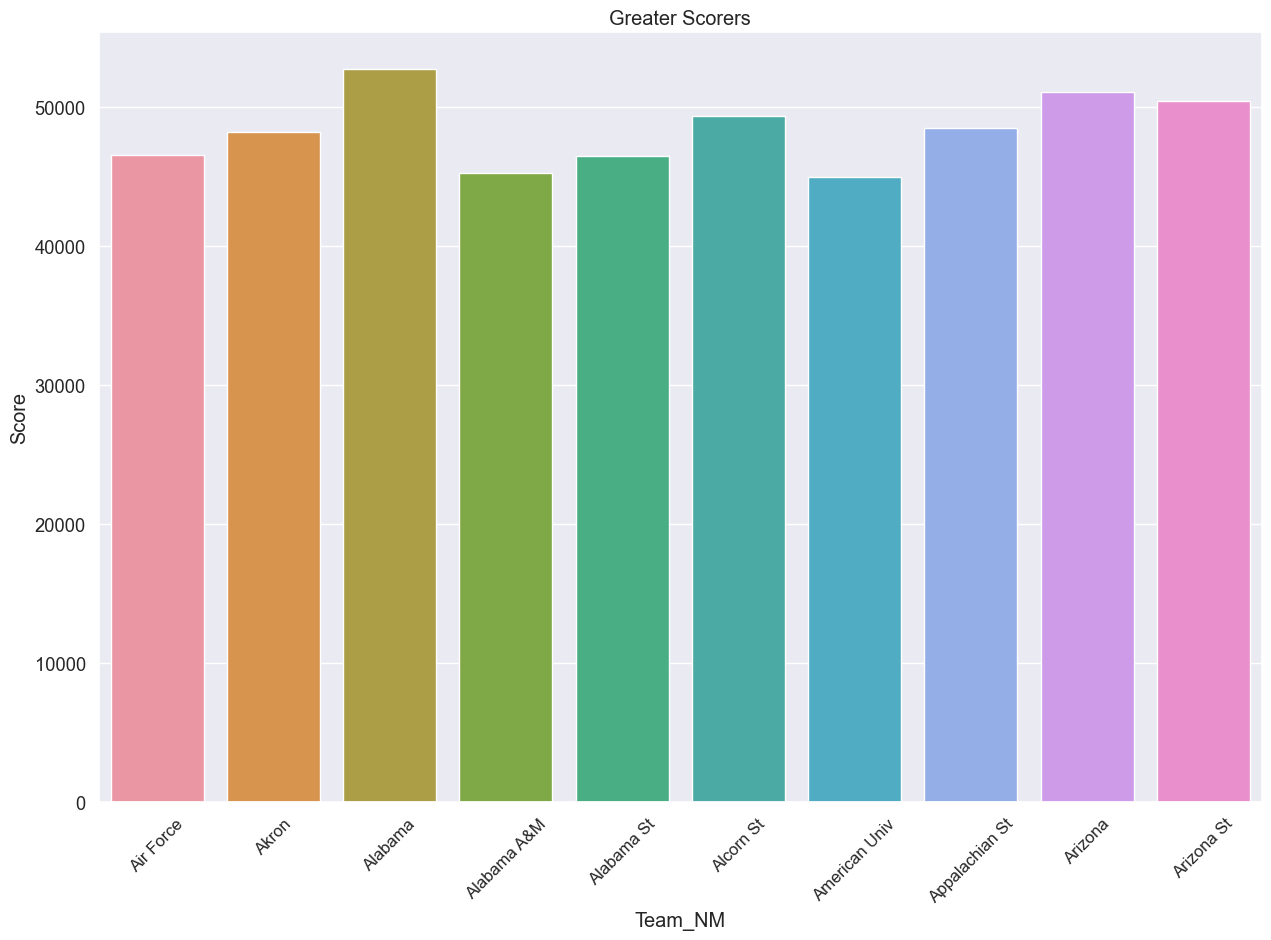

In [14]:
plt.figure(figsize=(15,10))
plt.title('Greater Scorers')
sns.barplot(data=Winners_Pts_hist_tops,
            x='Team_NM',
            y= 'Score')
plt.xticks(fontsize = 12, rotation= 45)

In [15]:
Win_Pts_season = pd.pivot_table(df,
               values='Score',
               index=['Team_NM'],
               columns=['Season'],
               aggfunc= sum)
Win_Pts_season = Win_Pts_season.fillna(value=0)
Win_Pts_season.sort_values(by=2025,
                            ascending= False,
                            inplace=True)

In [16]:
Win_Pts_season = Win_Pts_season.iloc[0:10, 12:]


<Axes: xlabel='Season', ylabel='Team_NM'>

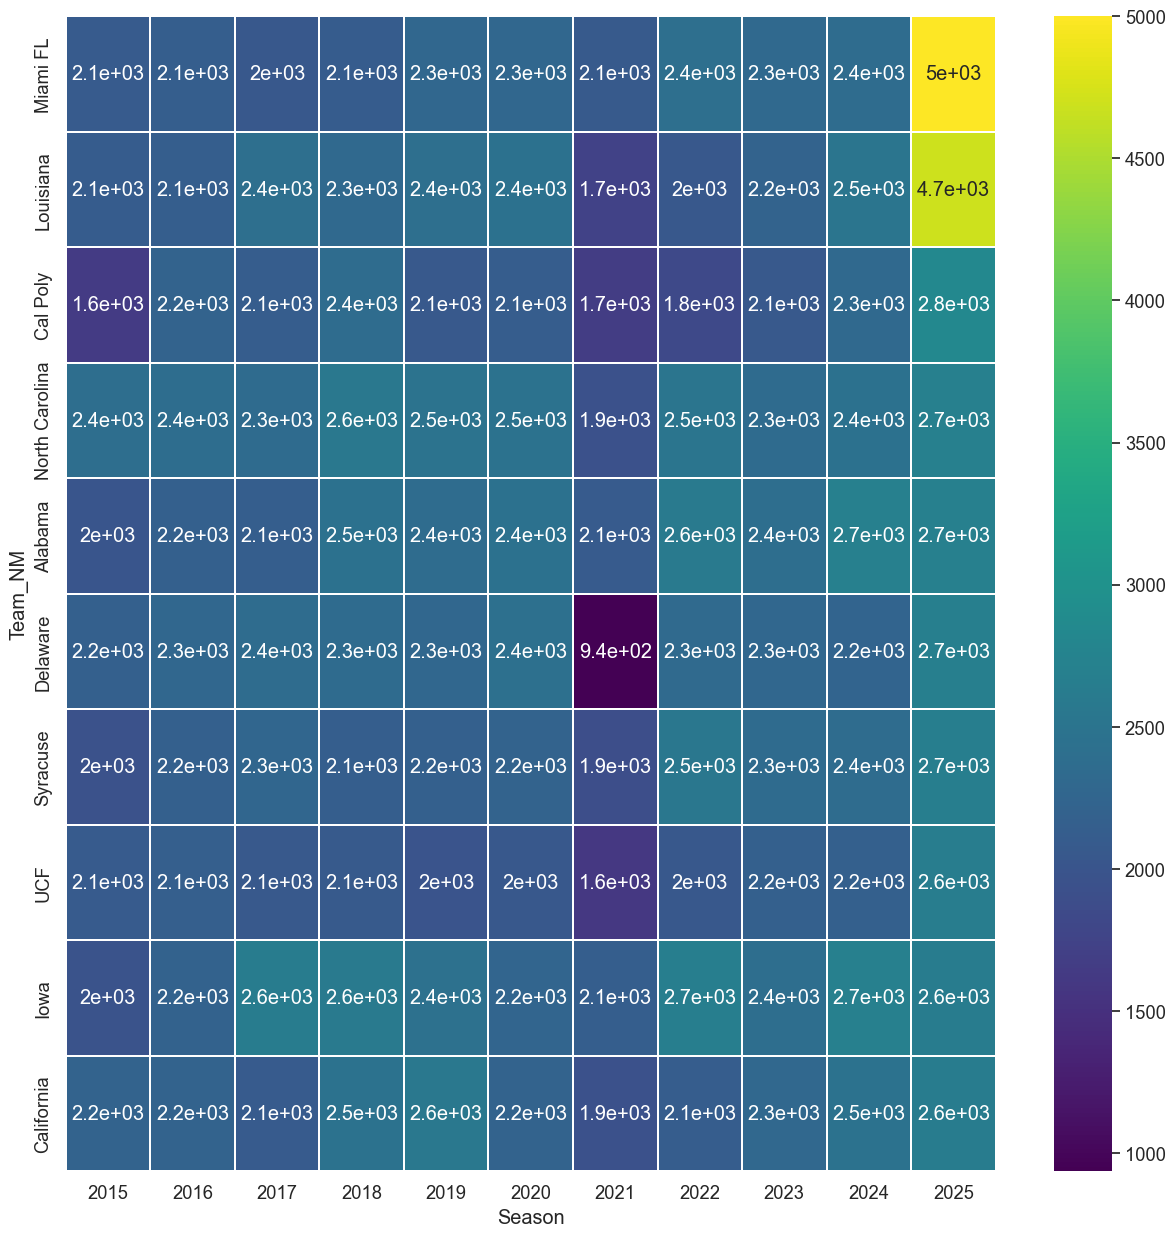

In [17]:
plt.figure(figsize=(15,	15))
sns.set_theme(style='darkgrid',	palette='Set2',	font_scale=1.2)
sns.heatmap(Win_Pts_season,	annot=True,	linewidths=0.1,	cmap='viridis')

c:\Users\asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



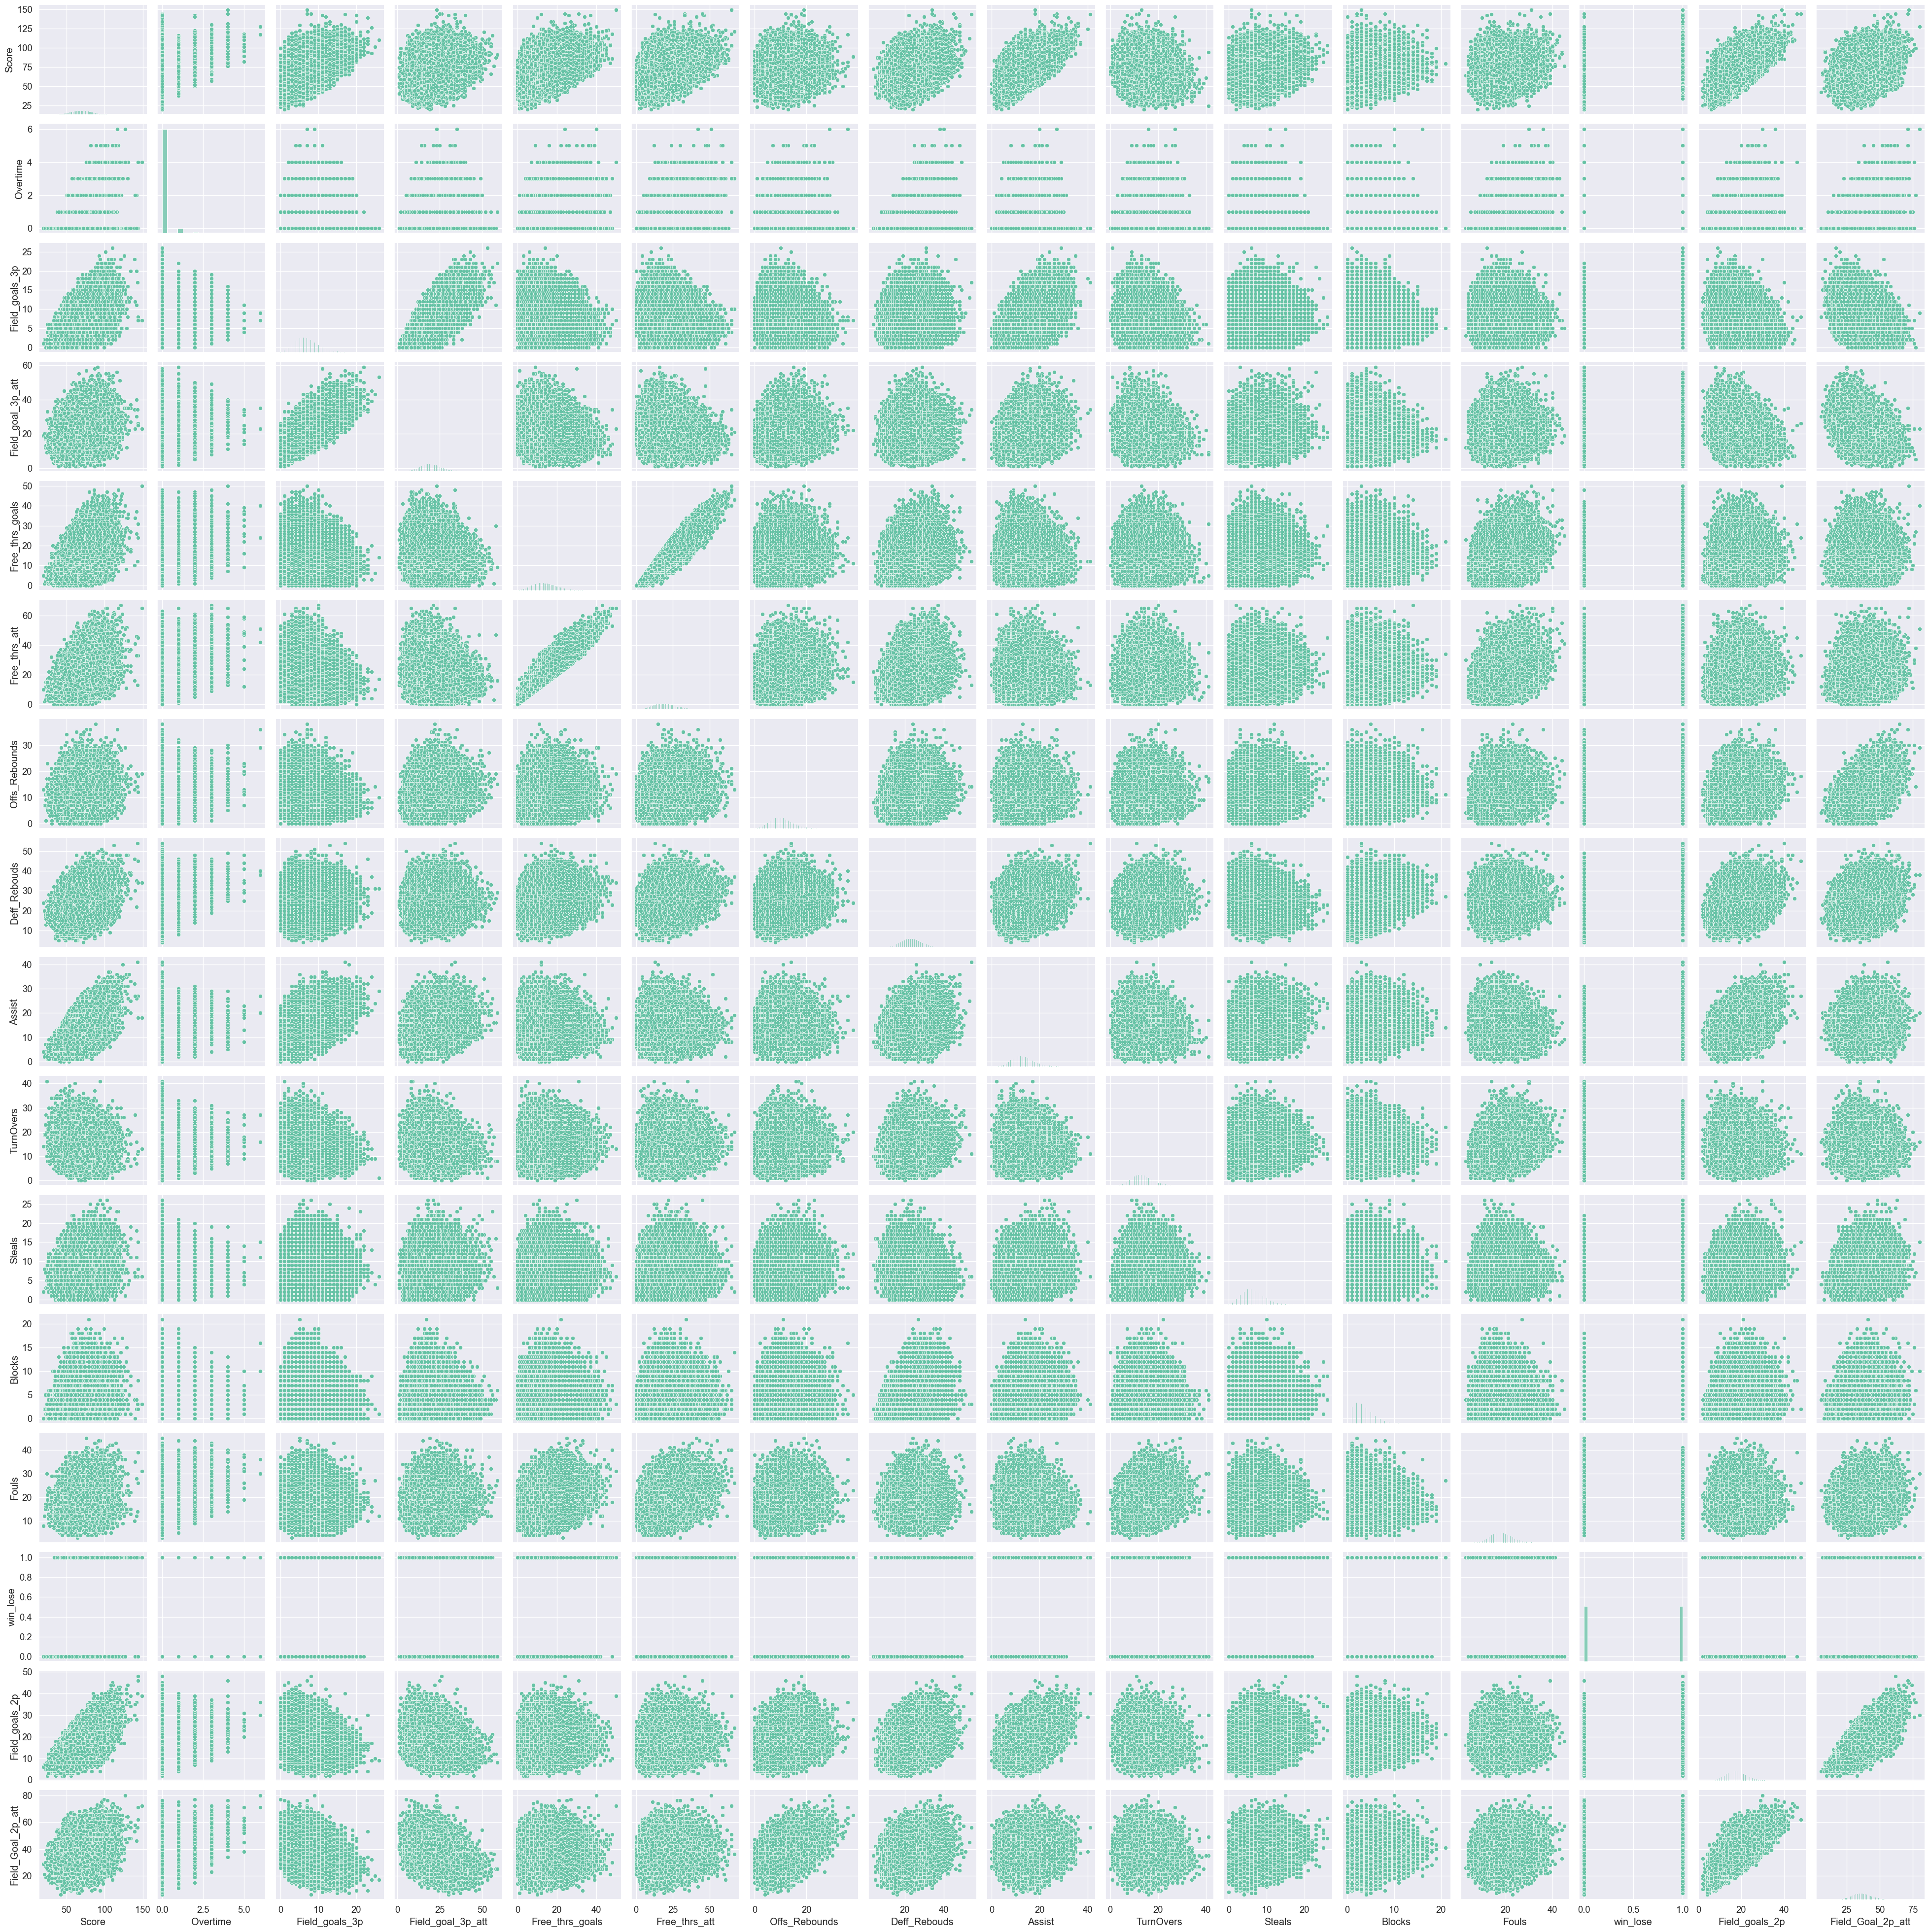

In [18]:
sns.pairplot(df[['Score', 'Overtime', 'Field_goals_3p', 'Field_goal_3p_att', 'Free_thrs_goals',
       'Free_thrs_att', 'Offs_Rebounds', 'Deff_Rebouds', 'Assist', 'TurnOvers',
       'Steals', 'Blocks', 'Fouls', 'win_lose', 'Field_goals_2p',
       'Field_Goal_2p_att']])

4.1 Regression Model in order to explain variables

In [19]:
y = df[['win_lose']]
x = df[['Field_goals_3p', 'Field_goal_3p_att', 'Free_thrs_goals',
       'Free_thrs_att', 'Offs_Rebounds', 'Deff_Rebouds', 'Assist', 'TurnOvers',
       'Steals', 'Blocks', 'Fouls', 'Field_goals_2p',
       'Field_Goal_2p_att']]
#'Overtime','Score'

In [20]:
x = sm.add_constant(x)
reg_Simp = sm.OLS(y,x)
result_Simp = reg_Simp.fit()

In [21]:
result_Simp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               win_lose   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                 2.360e+04
Date:                Sat, 12 Apr 2025   Prob (F-statistic):               0.00
Time:                        14:24:15   Log-Likelihood:                -76934.
No. Observations:              242598   AIC:                         1.539e+05
Df Residuals:                  242584   BIC:                         1.540e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5666      0.007     77.791      0.000       0.552       0.581
Field_goals_3p        0.0651      0.000    171.010      0.000       0.064       0.066
Field_goal_3p_att    -0.0424      0.000   -224.884      0.000      -0.043      -0.042
Free_thrs_goals       0.0248      0.000     82.805      0.000       0.024       0.025
Free_thrs_att        -0.0097      0.000    -40.083      0.000      -0.010      -0.009
Offs_Rebounds         0.0327      0.000    145.233      0.000       0.032       0.033
Deff_Rebouds          0.0368      0.000    238.616      0.000       0.036       0.037
Assist                0.0059      0.000     26.803      0.000       0.005       0.006
TurnOvers            -0.0321      0.000   -170.494      0.000      -0.033      -0.032
Steals                0.0402      0.000    161.212      0.000       0.040       0.041
Blocks                0.0089      0.000     28.500      0.000       0.008       0.010
Fouls                -0.0176      0.000   -103.635      0.000      -0.018      -0.017
Field_goals_2p        0.0415      0.000    170.074      0.000       0.041       0.042
Field_Goal_2p_att    -0.0382      0.000   -213.508      0.000      -0.039      -0.038
==============================================================================
Omnibus:                     6517.442   Durbin-Watson:                   1.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3293.800
Skew:                           0.057   Prob(JB):                         0.00
Kurtosis:                       2.441   Cond. No.                         694.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

4.2 Logit Model

In [22]:
#x = sm.add_constant(x)
reg_log = sm.Logit(y,x)
result_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.283460
         Iterations 8


In [23]:
result_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               win_lose   No. Observations:               242598
Model:                          Logit   Df Residuals:                   242584
Method:                           MLE   Df Model:                           13
Date:                Sat, 12 Apr 2025   Pseudo R-squ.:                  0.5911
Time:                        14:24:16   Log-Likelihood:                -68767.
converged:                       True   LL-Null:                   -1.6816e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2608      0.073      3.568      0.000       0.118       0.404
Field_goals_3p        0.6723      0.005    145.142      0.000       0.663       0.681
Field_goal_3p_att    -0.4284      0.002   -172.221      0.000      -0.433      -0.424
Free_thrs_goals       0.2459      0.003     77.466      0.000       0.240       0.252
Free_thrs_att        -0.1099      0.003    -43.890      0.000      -0.115      -0.105
Offs_Rebounds         0.3515      0.003    131.534      0.000       0.346       0.357
Deff_Rebouds          0.3769      0.002    179.075      0.000       0.373       0.381
Assist                0.0588      0.002     26.233      0.000       0.054       0.063
TurnOvers            -0.3414      0.002   -145.207      0.000      -0.346      -0.337
Steals                0.4241      0.003    139.798      0.000       0.418       0.430
Blocks                0.0922      0.003     28.545      0.000       0.086       0.099
Fouls                -0.1578      0.002    -85.217      0.000      -0.161      -0.154
Field_goals_2p        0.4466      0.003    147.244      0.000       0.441       0.453
Field_Goal_2p_att    -0.3974      0.002   -168.199      0.000      -0.402      -0.393
=====================================================================================
"""

4.2 Decision Tree

In [46]:
df_randtree = df[['Team_NM','Field_goals_3p', 'Field_goal_3p_att', 'Free_thrs_goals',
       'Free_thrs_att', 'Offs_Rebounds', 'Deff_Rebouds', 'Assist', 'TurnOvers',
       'Steals', 'Blocks', 'Fouls', 'Field_goals_2p',
       'Field_Goal_2p_att','win_lose']]

In [47]:
from sklearn import preprocessing

for col in df_randtree.select_dtypes(include=['object']).columns:

    label_encoder = preprocessing.LabelEncoder()

    label_encoder.fit(df_randtree[col].unique())

    df_randtree[col] = label_encoder.transform(df_randtree[col])

    print(f"{col}: {df_randtree[col].unique()}")

Team_NM: [226 297 344 363 104  82 232  56 195 331   5  31  22  90  98  26 235 121
  62  28 291 154 116 354 253 368  79  47 188 132 259 365 171 134 236 311
 102 151 266 347  49  42  34 162 120 362 108 115  91  11 218 370 327  71
  67 158 210  59  64 209 326   7 322 191 334 184 186 160  33 318 369  39
 349 176 217 314 247 183 233 263 282   6 346 119  38 265 101 328 289  25
 319 123 283 258  81  76 141 321  72 353 144 137 206  23 306 246  29  15
 268 190 197  12  48 231 150   1 189 332  86 205 242  78 117 185 204 269
 177  27 264 260 207 181 312 125 165 148 211 270  19 352   2  73 203  52
 294 133 180  57 129 272 163 298 147 351 276 356 228 145 303 299  83 249
 341 301  51 239   4  93  50 284  99 234  68 360 135 335 348 169  10  40
  30 170  54 221  14 340 157  96 333 105 324 254  65 222 252 290 112 107
  75 308  44  13 330 323 243 296  45 262 128 100 140 339 161 114 367 202
  87 172 250 345 220 153 300  60 136 286  61 187 313 285  92 316 156 225
 227 251 293 216 343 178 223 122 248  53  

In [48]:
df1 = df_randtree.rename(columns={'win_lose':'y'})

In [49]:
X = df1.drop('y',axis=1)
y = df1['y']
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0)

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3,4,5,6,7,8],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1,2,3,4],
    'random_state': [0,42]
}

grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [51]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=8, min_samples_leaf=1,min_samples_split=2)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, random_state=0)

In [52]:
y_pred = dtree.predict(X_test)
print("Accuracy Score: ", round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy Score:  77.24 %


In [53]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F1_Score: ',(f1_score(y_test, y_pred,average='micro')))
print('Precision Score: ',(precision_score(y_test, y_pred,average='micro')))
print('Recall Score: ',(recall_score(y_test, y_pred,average='micro')))
print('Jaccard Score: ',(jaccard_score(y_test, y_pred,average='micro')))
#print('Log Loss: ',(log_loss(y_test, y_pred)))

F1_Score:  0.7724237427864798
Precision Score:  0.7724237427864798
Recall Score:  0.7724237427864798
Jaccard Score:  0.6292266881568785


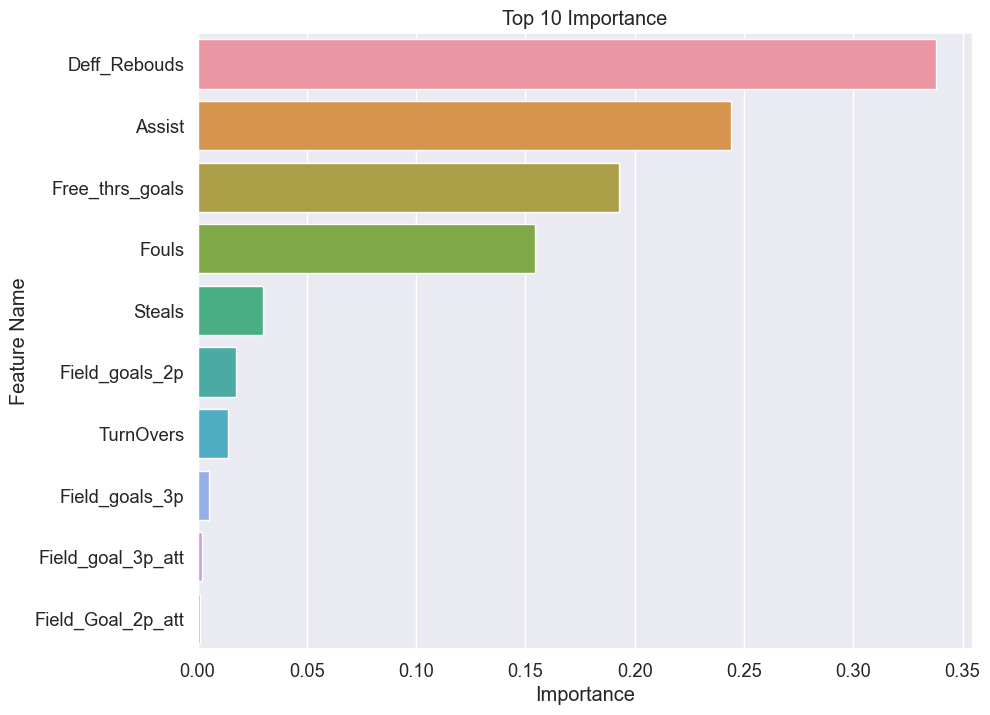

In [54]:
imp_df = pd.DataFrame({
    "Feature_Name": X_train.columns,
    "Importance": dtree.feature_importances_
})

fi= imp_df.sort_values(by="Importance", ascending=False)
fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2,x='Importance',y='Feature_Name')
plt.title('Top 10 Importance')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.show()

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.7724237427864798')

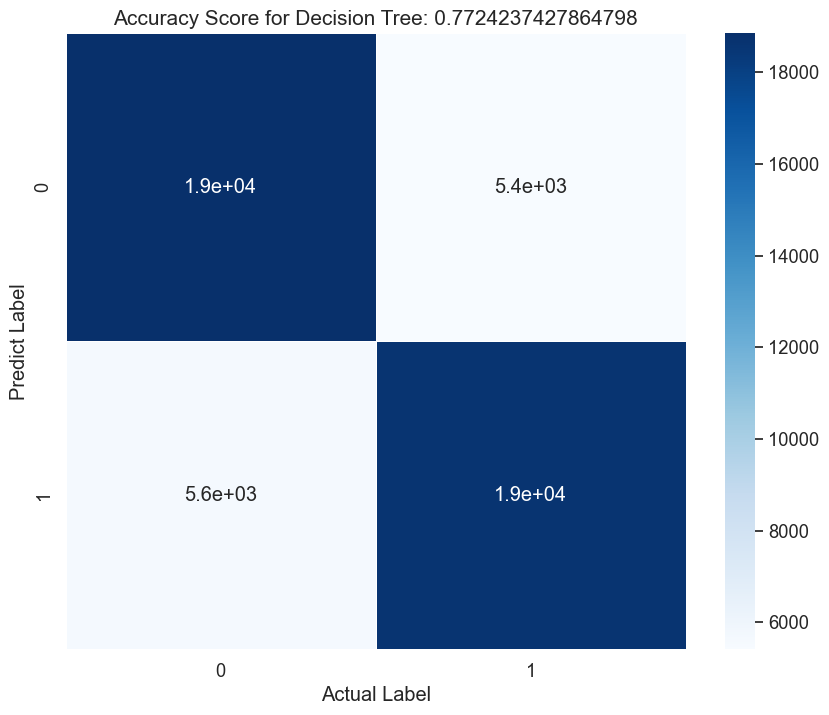

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(data=cm,linewidths=.5,annot=True, cmap= 'Blues')
plt.xlabel('Actual Label')
plt.ylabel('Predict Label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test,y_test))
plt.title(all_sample_title, size=15)

In [166]:
# from sklearn.metrics import roc_curve, roc_auc_score 

# y_pred_proba = dtree.predict_proba(X_test)[:][:,1] 

# df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])]) 
# df_actual_predicted.index = y_test.index 
# fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual', df_actual_predicted['y_pred_proba']]) 
# auc = roc_auc_score(df_actual_predicted['y_actual',df_actual_predicted['y_pred_proba']]) 
# plt.plot(fpr,tpr, label = 'AUC = %0.4f' %auc) 
# plt.plot(fpr,tpr, linestyle= '--', color='k') 
# plt.plot('False Positive Rate') 
# plt.plot('True Positive Rate') 
# plt.title('ROC Curve', size=15) 
# plt.legend()

5.1 Random Forest

In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')

param_grid = {
    'n_estimators': [5,10,50],
    'max_depth': [None,5,10],
    'max_features': ['sqrt','log2',None],
    'random_state': [0,30]
}

grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 50, 'random_state': 30}


In [159]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=30,max_depth=None,max_features='sqrt',n_estimators=50)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=30)

In [160]:
y_pred = rfc.predict(X_test)
print("Accuracy Score: ", round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy Score:  83.49 %


In [161]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F1_Score: ',(f1_score(y_test, y_pred,average='micro')))
print('Precision Score: ',(precision_score(y_test, y_pred,average='micro')))
print('Recall Score: ',(recall_score(y_test, y_pred,average='micro')))
print('Jaccard Score: ',(jaccard_score(y_test, y_pred,average='micro')))
#print('Log Loss: ',(log_loss(y_test, y_pred)))

F1_Score:  0.8348928276999176
Precision Score:  0.8348928276999176
Recall Score:  0.8348928276999176
Jaccard Score:  0.7165802833843378


Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.8348928276999176')

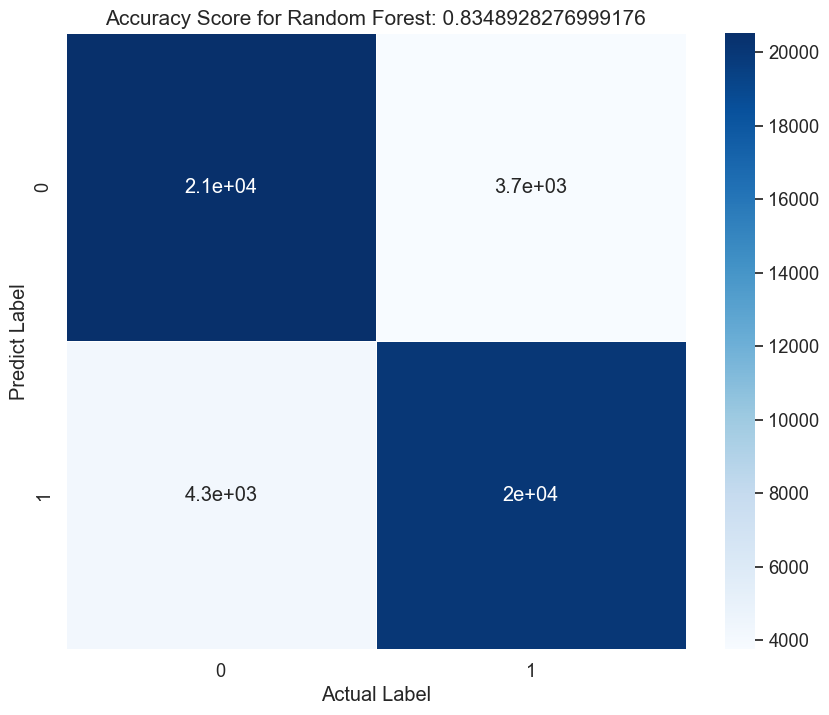

In [162]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(data=cm,linewidths=.5,annot=True, cmap= 'Blues')
plt.xlabel('Actual Label')
plt.ylabel('Predict Label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test,y_test))
plt.title(all_sample_title, size=15)

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# # Cargar tu DataFrame (df) aquí
# # df = pd.read_csv('your_data.csv')  # Si lo estás cargando desde un archivo

# # Asumimos que tienes una columna de fechas o un índice temporal
# # Si no es así, se puede generar uno artificialmente

# df['Date'] = pd.date_range(start='1/1/2020', periods=len(df), freq='D')  # Simulación de fechas
# df.set_index('Date', inplace=True)

# # Definir las características (X) y la variable objetivo (y)
# X = df[['Field_goals_3p', 'Field_goal_3p_att', 'Free_thrs_goals',
#         'Free_thrs_att', 'Offs_Rebounds', 'Deff_Rebouds', 'Assist', 'TurnOvers',
#         'Steals', 'Blocks', 'Fouls', 'Field_goals_2p',
#         'Field_Goal_2p_att']]
# y = df['win_lose']  # Variable objetivo

# # Dividir en conjuntos de entrenamiento y prueba
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Entrenar el modelo Random Forest
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # Evaluar el modelo
# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print(f'Error Cuadrático Medio: {mse}')

# # Generar los próximos 190 días
# future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=190, freq='D')
# future_X = X.iloc[-1:].values  # Utilizamos el último conjunto de características como referencia

# # Crear predicciones futuras
# future_predictions = [model.predict(future_X)[0] for _ in range(190)]
# future_df = pd.DataFrame({'Date': future_dates, 'win_lose_pred': future_predictions})

# print(future_df)


In [170]:
pd.DataFrame(rfc.predict(X_test), columns=['Prediction'])

Prediction
0               1
1               0
2               0
3               0
4               1
...           ...
48515           0
48516           0
48517           0
48518           0
48519           0

[48520 rows x 1 columns]